In [12]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
tweets_df = pd.read_csv('twitter.csv') # read tweeets from dataset
tweets_df

,ItemID,Sentiment,SentimentText,Unnamed: 3
0,1,0,is so sad for my APL frie...,NaN
1,2,0,I missed the New Moon trail...,NaN
2,3,1,omg its already 7:30 :O,NaN
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,NaN
4,5,0,i think mi bf is cheating on me!!! ...,NaN
...,...,...,...,...
11111,11112,0,&quot;We were young and times were easy.. But ...,NaN
11112,11113,1,&quot;we will still change color wherever we g...,NaN
11113,11114,1,&quot;welcome home&quot; yay! ...it was a fas...,NaN
11114,11115,1,&quot;Welcome To Hollywood&quot; - Get Mitchel...,NaN


In [14]:
tweets_df.info() #check the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11116 entries, 0 to 11115
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         11116 non-null  int64 
 1   Sentiment      11116 non-null  int64 
 2   SentimentText  11116 non-null  object
 3   Unnamed: 3     11 non-null     object
dtypes: int64(2), object(2)
memory usage: 347.5+ KB


In [15]:
tweets_df = tweets_df.drop(columns=['Unnamed: 3', 'ItemID']) #drop unnecessary columns

In [16]:
tweets_df

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
11111,0,&quot;We were young and times were easy.. But ...
11112,1,&quot;we will still change color wherever we g...
11113,1,&quot;welcome home&quot; yay! ...it was a fas...
11114,1,&quot;Welcome To Hollywood&quot; - Get Mitchel...


# visualize data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDB7EE0190>]],
      dtype=object)

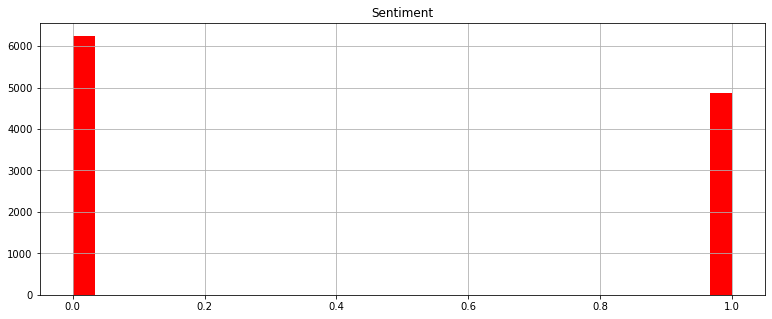

In [18]:
tweets_df.hist(bins = 30, figsize=(13, 5), color = 'r' ) #visulize sentiment counts

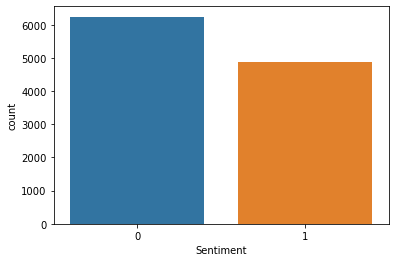

In [24]:
sns.countplot(tweets_df['Sentiment'], label = "Count") #visulize sentiment counts with seaborn library

In [19]:
tweets_df['length'] = tweets_df['SentimentText'].apply(len) #add a LENGTH column to dataframe for text length

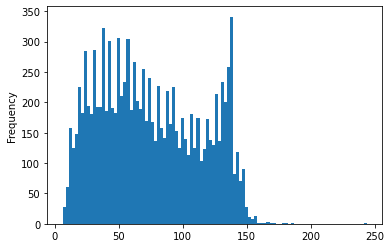

In [20]:
tweets_df['length'].plot(bins = 100, kind = 'hist') #visualize the frequency of text-length

In [21]:
tweets_df.describe() #see the description of dataframe. we see that the average text-length is 75

,Sentiment,length
count,11116.000000,11116.000000
mean,0.438287,75.059374
std,0.496199,39.454810
min,0.000000,6.000000
25%,0.000000,42.000000
50%,0.000000,70.000000
75%,1.000000,109.000000
max,1.000000,244.000000


In [23]:
tweets_df[tweets_df['length'] == 75]['SentimentText'].iloc[0] #see a sample tweet from dataset

"  I missed the first hour of SYTYCD last night, and I can't find it online!"

In [24]:
# categorize tweets in 2 groups of sentiment
positive = tweets_df[tweets_df['Sentiment'] == 1]
negative = tweets_df[tweets_df['Sentiment'] == 0]

In [25]:
sentences = tweets_df['SentimentText'].tolist()
sentences_as_one_string = " ".join(sentences)

In [26]:
!pip install WordCloud

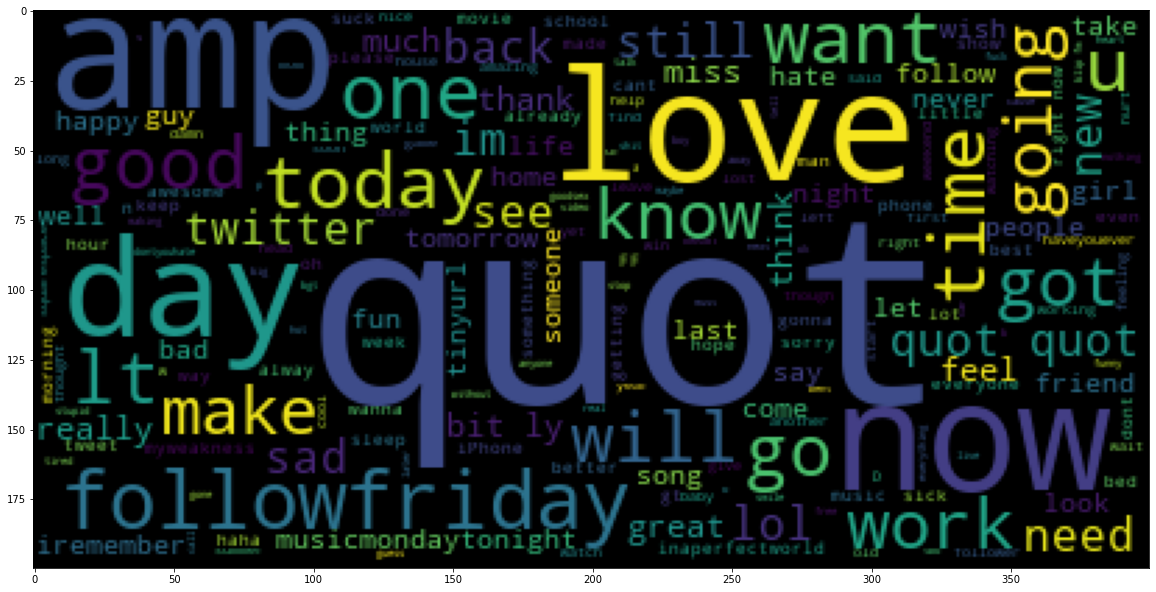

In [27]:
# visulize all tweets with WorldCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [28]:
positive_string = positive['SentimentText'].tolist()
negative_string = negative['SentimentText'].tolist()

positive_as_one_string = " ".join(positive_string)
negative_as_one_string = " ".join(negative_string)

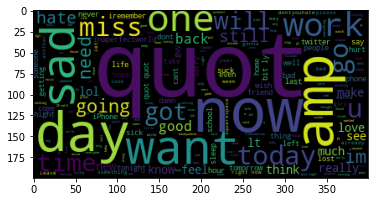

In [29]:
plt.imshow(WordCloud().generate(negative_as_one_string)) #visualize negative tweets

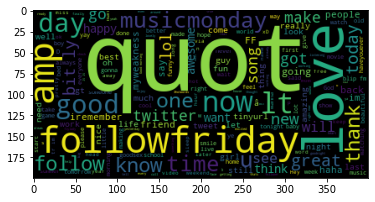

In [30]:
plt.imshow(WordCloud().generate(positive_as_one_string)) #visualize positive tweets

# preprocessing and data cleaning

In [31]:
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords

#implement a function for data cleaning
def message_cleaning(message):
    pun_removed = [char for char in message if char not in (string.punctuation or ['qoute'])] #clean punctuations
    pun_removed_join = ''.join(pun_removed)
    pun_removed_join_clean = [word for word in pun_removed_join.split() if word.lower() not in stopwords.words('english')] #clean stopwords
    return pun_removed_join_clean

In [36]:
tweets_df_clean = tweets_df['SentimentText'].apply(message_cleaning)
print(tweets_df_clean)

0                                       [sad, APL, friend]
1                             [missed, New, Moon, trailer]
2                                      [omg, already, 730]
3        [Omgaga, Im, sooo, im, gunna, CRy, Ive, dentis...
4                            [think, mi, bf, cheating, TT]
                               ...                        
11111    [quotWe, young, times, easy, could, see, quot,...
11112    [quotwe, still, change, color, wherever, go, a...
11113           [quotwelcome, homequot, yay, fast, flight]
11114    [quotWelcome, Hollywoodquot, Get, Mitchel, Mus...
11115               [quotWelcome, Titanium, Mobile, close]
Name: SentimentText, Length: 11116, dtype: object


# vectorization

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8').fit_transform(tweets_df['SentimentText']).toarray()

In [38]:
tweets_countvectorizer.shape
# it means there are 25745 unique words in our curpos

(11116, 25745)

In [39]:
x = tweets_countvectorizer
y = tweets_df['Sentiment']

# Naive Bayse

In [41]:
 x.shape , y.shape

((11116, 25745), (11116,))

In [42]:
from sklearn.model_selection import train_test_split
# split train and test set by 80%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [43]:
from sklearn.naive_bayes import MultinomialNB
# using naive baise classifier 
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

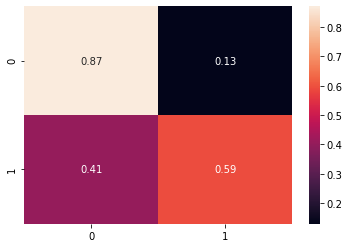

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
# build confusion matrix
y_predit = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predit, normalize='true')
sns.heatmap(cm, annot=True)

In [45]:
print(classification_report(y_test, y_predit))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1238
           1       0.78      0.59      0.68       986

    accuracy                           0.75      2224
   macro avg       0.76      0.73      0.73      2224
weighted avg       0.75      0.75      0.74      2224

